# Table of Contents

1. [Objective](#Objective)
2. [The Data](#The-Data)
3. [Project Approach](#Project-Approach)
    - [Data Cleaning](#Data-Cleaning)
        - [Set up Data Cleaning tools](#Set-up-Data-Cleaning-tools)
        - [Data Cleaning Functions](#Data-Cleaning-Functions)
        - [Data Types](#Data-Types)
        - [Missing Values](#Missing-Values)
        - [Duplicate Records](#Duplicate-Records)
        - [Outliers](#Outliers)
    - [Exploratory Data Analysis](#Exploratory-Data-Analysis)
        - [Set up SQL for Data Analysis](#Set-up-SQL-for-Data-Analysis)
        - [Data Analysis Functions](#Data-Analysis-Functions)
        - [Numerical Variables](#Numerical-Variables)
        - [Categorical Variables](#Categorical-Variables)
    - [Detailed Analysis](#Detailed-Analysis)
    

# Objective

Global Loan Financial (GL Financial), a hypothetical Lending and Financing company, would like to better understand customer tendencies to default on loans in their loan financing program.

The Analytics team will be examining historical data to understand what factors most affect loan defaults.

Stakeholders are interested in better understanding the data they have to help inform decisions related to granting loans in the future.

1. Which customers are MOST likely to default on loan repayments?
2. Which customers are LEAST likely to default on loan repayments?

# The Data

Find below the description of each variable name in the dataset.

| Variable Name | Variable Description   |
|------|------|
|   person_age (years)  | The age of the applicant|
| person_income (USD) | The annual income of the applicant |
| person_home_ownership | The applicant's home ownership status |
| person_emp_length (years) | The applicant's employment length |
| loan_intent | What the applicant intends to do with the loan |
| loan_grade | The applicant's loan grade |
| loan_amnt (USD) | The loan amount granted to applicant |
| loan_int_rate | The loan interest rate |
| loan_percent_income | The percent of the applicant's income that is equal to the loan amount |
| cb_person_default_on_file (Y, N) | Whether or not the applicant has a credit bureau default on file |
| cb_person_cred_hist_length (years) | The credit bureau's record of the applicant's credit history length |
| loan_status (0, 1) | Loan status (0 is non default 1 is default) |

# Software Engineering

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sqlite3 as sql

## Functions
It is good practice to write functions that will enable ease of project execution and avoid repetition.

In [2]:
def get_dtypes_df(df):
    '''
    Returns - dataframe's column names and their data types
    in its own dataframe
    Args - df: dataframe object
    '''
    dtypes_df = pd.DataFrame(df.dtypes).rename(columns = {0: "Dtype"})
    return dtypes_df

def get_num_dtypes_df(df, dtypes_df):
    '''
    Returns - thoroughly filtered dtypes_df 
    including only numerical variable columns
    Args - df: dtypes_df dataframe object
    '''
    num_dtypes_df = dtypes_df[(dtypes_df.Dtype != "object")]

    # remove categorical with dummy variables
    for col in num_dtypes_df.index:
        if list(df[col].unique()) == [1,0] or list(df[col].unique()) == [0,1]:
            print(f"{col} column was removed.")
            num_dtypes_df = num_dtypes_df.drop(col, axis = 0)
    return num_dtypes_df

def get_cat_dtypes_df(df, dtypes_df):
    '''
    Returns - thoroughly filtered dtypes_df 
    including only categorical variable columns
    Args - df: dtypes_df dataframe object
    '''
    categorical = []
    for col in dtypes_df.index:
        if list(df[col].unique()) == [1,0] or list(df[col].unique()) == [0,1]:
            categorical.append(col)
    for i in dtypes_df[dtypes_df['Dtype'] == "object"].index:
        categorical.append(i)
    return dtypes_df.loc[categorical]

def query(sql_query):
    '''
    Returns dataframe 
    '''
    return pd.read_sql(sql_query, conn)

def vbar(data, xlabel, ylabel = 'Count', col = "", title = ""):
    sns.countplot(data = data, x = col, order = data[col].value_counts().index, 
                  color = 'grey').set_title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

def hbar(data, ylabel, xlabel = 'Count', col = "", title = ""):
    sns.countplot(data = data, y = col, order = data[col].value_counts().index, 
                  color = 'grey').set_title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

# Project Approach

## Data Cleaning

### Data Cleaning Call-outs
- 
- 
- 
- 

In [3]:
# Load data and quick look
CreditData = pd.read_csv("credit_risk_dataset.csv")
CreditData.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
# Get shape of data
CreditData.shape

(32581, 12)

### Data Cleaning Functions
It is good practice to write functions that will enable ease of project execution and avoid repetition. This set of functions is for data cleaning.

### Data Types

In [5]:
# All data types
dtypes = get_dtypes_df(CreditData)
dtypes

,Dtype
person_age,int64
person_income,int64
person_home_ownership,object
person_emp_length,float64
loan_intent,object
loan_grade,object
loan_amnt,int64
loan_int_rate,float64
loan_status,int64
loan_percent_income,float64


Based on the column desriptions, all the data types look to be correctly assigned to each column.

In [6]:
# Numerical Data Types
num_dtypes = get_num_dtypes_df(CreditData, dtypes)
num_dtypes

loan_status column was removed.


,Dtype
person_age,int64
person_income,int64
person_emp_length,float64
loan_amnt,int64
loan_int_rate,float64
loan_percent_income,float64
cb_person_cred_hist_length,int64


In [7]:
# Categorical Data Types
cat_dtypes = get_cat_dtypes_df(CreditData, dtypes)
cat_dtypes

,Dtype
loan_status,int64
person_home_ownership,object
loan_intent,object
loan_grade,object
cb_person_default_on_file,object


### Missing Values

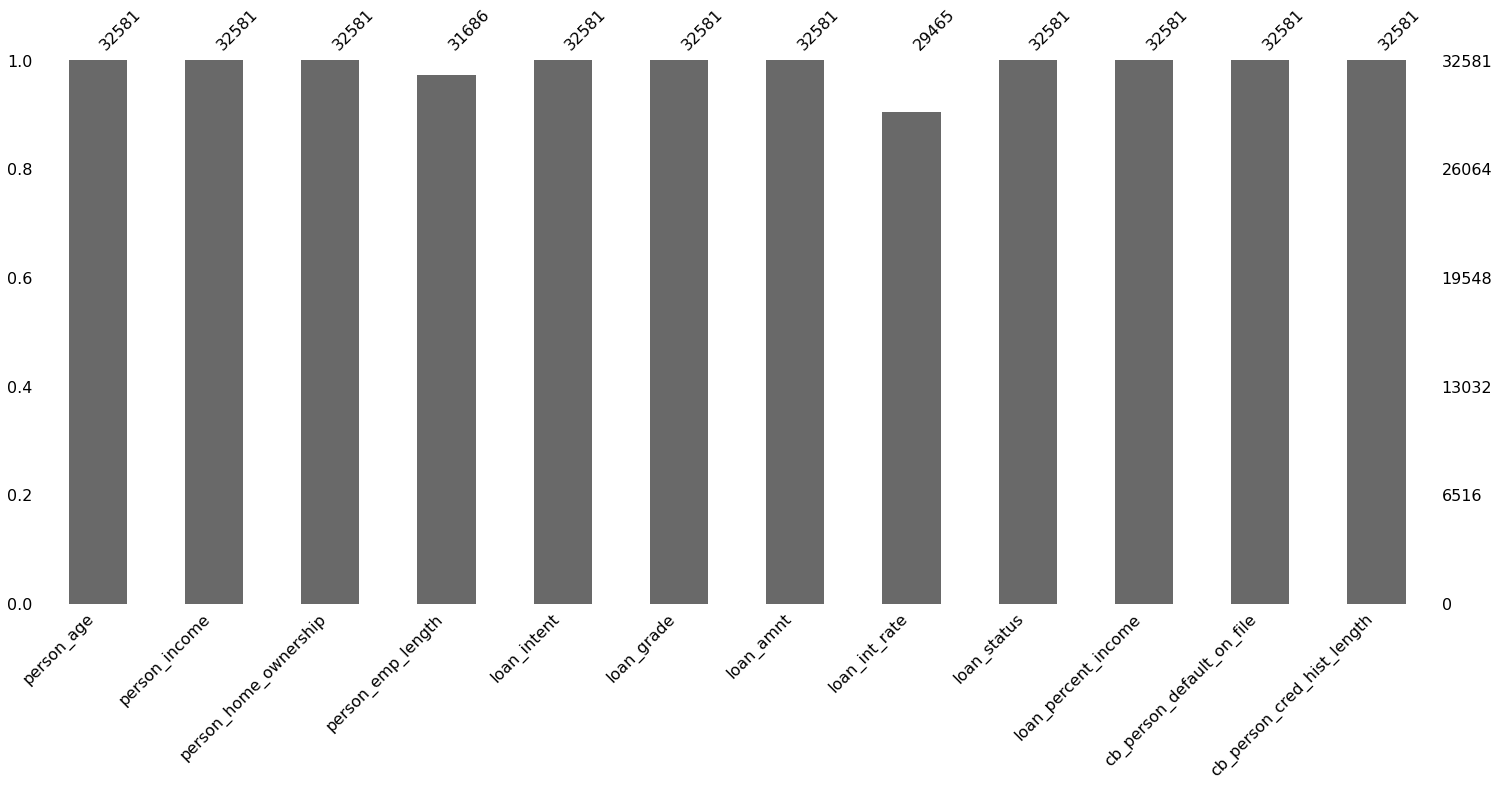

In [8]:
# Visualize Missing Values in bar graph
msno.bar(CreditData);

Two columns were found to have missing values: `person_emp_length` and `loan_int_rate`

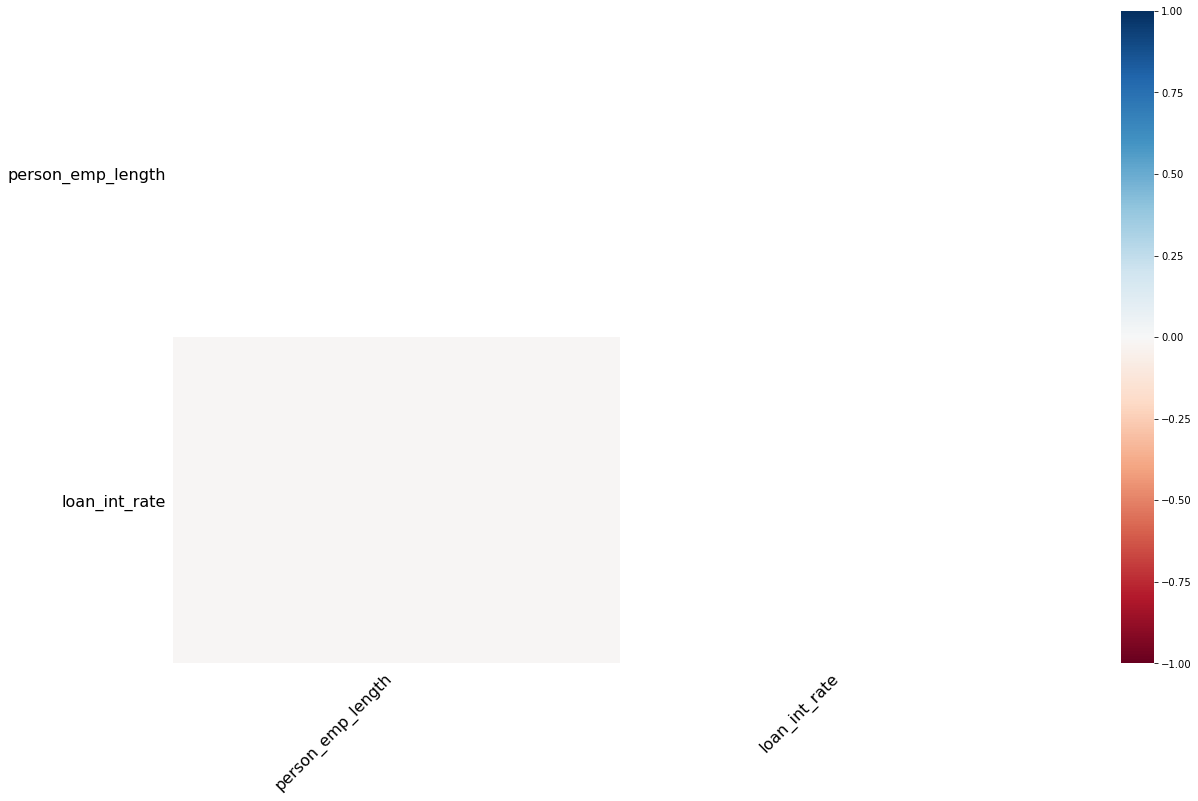

In [9]:
# Visualize Potential Relationship between missing value columns
msno.heatmap(CreditData);

As shown in the heatmap above, there is very little to no relationship between the columns with missing values. Hence, the actual amount of rows that are affected by missing values is GREATER than the number of rows affected by missing values from the column with more missing values - i.e GREATER than amount of `loan_int_rate` missing values.

In [10]:
# Amount of loan_int_rate null rows

loan_int_rate_null_rows = len(CreditData[CreditData['loan_int_rate'].isnull()])

print(f"The actual number of null rows is {loan_int_rate_null_rows}, which constitutes\
 {int(100*(loan_int_rate_null_rows/len(CreditData)))}% of the observations.")


# Amount of total rows

null_rows = len(CreditData[CreditData.isnull().any(axis=1)])
print(f"The actual number of null rows is {null_rows}, which constitutes\
 {int(100*(null_rows/len(CreditData)))}% of the observations.")

The actual number of null rows is 3116, which constitutes 9% of the observations.
The actual number of null rows is 3943, which constitutes 12% of the observations.


There are two possible ways missing values can be handled:
1. Delete all rows with missing values
2. Impute values based on statistical or machine learning methods.

For the purpose of clarity in explainability of approach, we opt to delete all rows with missing values. This means that we will be retaining ~88% of the original observations, or 28,638 of the original 32,581 observations.

In [11]:
# Drop Rows with Missing Values
CreditData = CreditData.dropna().reset_index(drop = True)

In [12]:
# Check shape again
CreditData.shape

(28638, 12)

As expected, we now have 28,638 rows in the dataset

### Duplicate Records
There is only one way of handling duplicate records. Delete them.

In [13]:
# Number of duplicated records
num_dupes = sum(CreditData.duplicated())

print(f"The number of non-null duplicated rows is {num_dupes}\
 which consitutes {round(100*(num_dupes/len(CreditData)), 2)}% of the observations.")

The number of non-null duplicated rows is 137 which consitutes 0.48% of the observations.


In [14]:
# Drop Duplicates
CreditData = CreditData.drop_duplicates().reset_index(drop = True)
print(f"{num_dupes} duplicate rows were deleted. The dataset now has {len(CreditData)} rows.")

137 duplicate rows were deleted. The dataset now has 28501 rows.


In [15]:
# Check Shape again
CreditData.shape

(28501, 12)

Again, as expected there are now 28,501 records in the dataset

### Outliers

Outliers, if not properly handled, can incorrectly skew our measures of central tendency (mean, mode, median), though the median would be negligibly affected for attributes with small variances. 

Boxplots are a great way to visualize the distribution of a numerical variable, as well as compare with a categorical variable to understand spread and median relationship across categories.
Here, we will do this with all numerical variables against the categorical variable `cb_person_default_on_file`

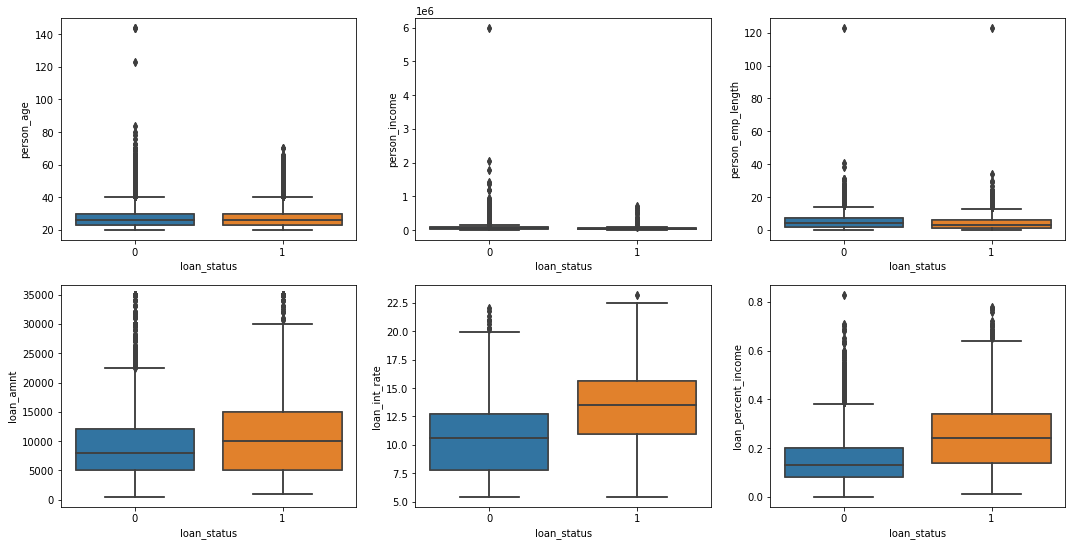

In [16]:
'''
show_outliers(num_dtypes, 
              CreditData,
    target_var = "cb_person_default_on_file", 
    rows = 2, 
    cols = 3,
    figsize = (18,9))
'''



target_var = "cb_person_cred_hist_length"
rows = 2 
cols = 3 
figsize = (18,9)


fig, axs = plt.subplots(rows, cols, figsize=figsize)

y_lst = np.array(num_dtypes.drop(target_var, axis = 0).index).reshape(rows,cols)
for i in range(len(axs)):
    for j in range(len(axs[i])):
        for v in range(len(y_lst)):
            sns.boxplot(x = "loan_status", y = y_lst[i,j] , data = CreditData, ax = axs[i,j])

Looking at the above boxplots, we see that the medians Loan Interest Rate, Loan Percentage of income and Loan Amount are all higher for individuals that default. It is important to note that all 3 of these variables are directly within the control of GL financial. The trends for the Person Age, Person Income and Person Employment Length are difficult to decipher on the boxplot. Furthermore, there are clearly some incorrect outliers for person_age and person_emp_length. These rows will be removed from the dataset, after which we will check the distribution again.

In [17]:
CreditData = CreditData[(CreditData['person_age'] < 120) & (CreditData['person_emp_length'] < 120)]

# Check Shape again
CreditData.shape

(28495, 12)

The removal of incorrect outliers reduced our dataset by 6 records, down to 28,495 records. Let's take a look at the boxplots again.

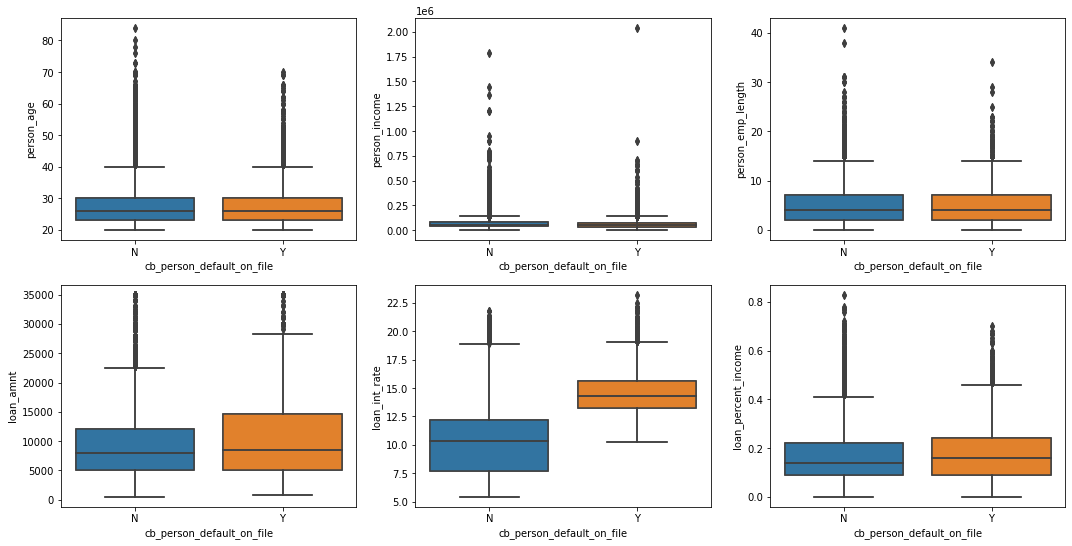

In [18]:
target_var = "cb_person_cred_hist_length"
rows = 2 
cols = 3 
figsize = (18,9)


fig, axs = plt.subplots(rows, cols, figsize=figsize)

y_lst = np.array(num_dtypes.drop(target_var, axis = 0).index).reshape(rows,cols)
for i in range(len(axs)):
    for j in range(len(axs[i])):
        for v in range(len(y_lst)):
            sns.boxplot(x = "cb_person_default_on_file", y = y_lst[i,j] , data = CreditData, ax = axs[i,j])

The above distributions looks safer for our measures of central tendency. We can still see that person_income has some outliers. We will not remove those because it is perfectly possible for individual incomes to be that high.

## Exploratory Data Analysis

### Exploratory Data Analysis Call-outs
- 
- 
- 
- 

### Set up SQL for Data Analysis

In [19]:
conn = sql.connect("credit_risk_data.db")

In [20]:
CreditData.to_sql('CreditData', conn, if_exists = 'replace', index = False)

### Numerical Variables
In this section we will explore general relationships between numerical variables in our dataset. Two powerful visuals for accomplishing this are the pairplot and the correlation matrix. 
The pairplot shows individual distributions with density curves as well as scatterplots between numerical variables. 
The correlation matrix quantifies the strength and direction of correlation between numerical variables

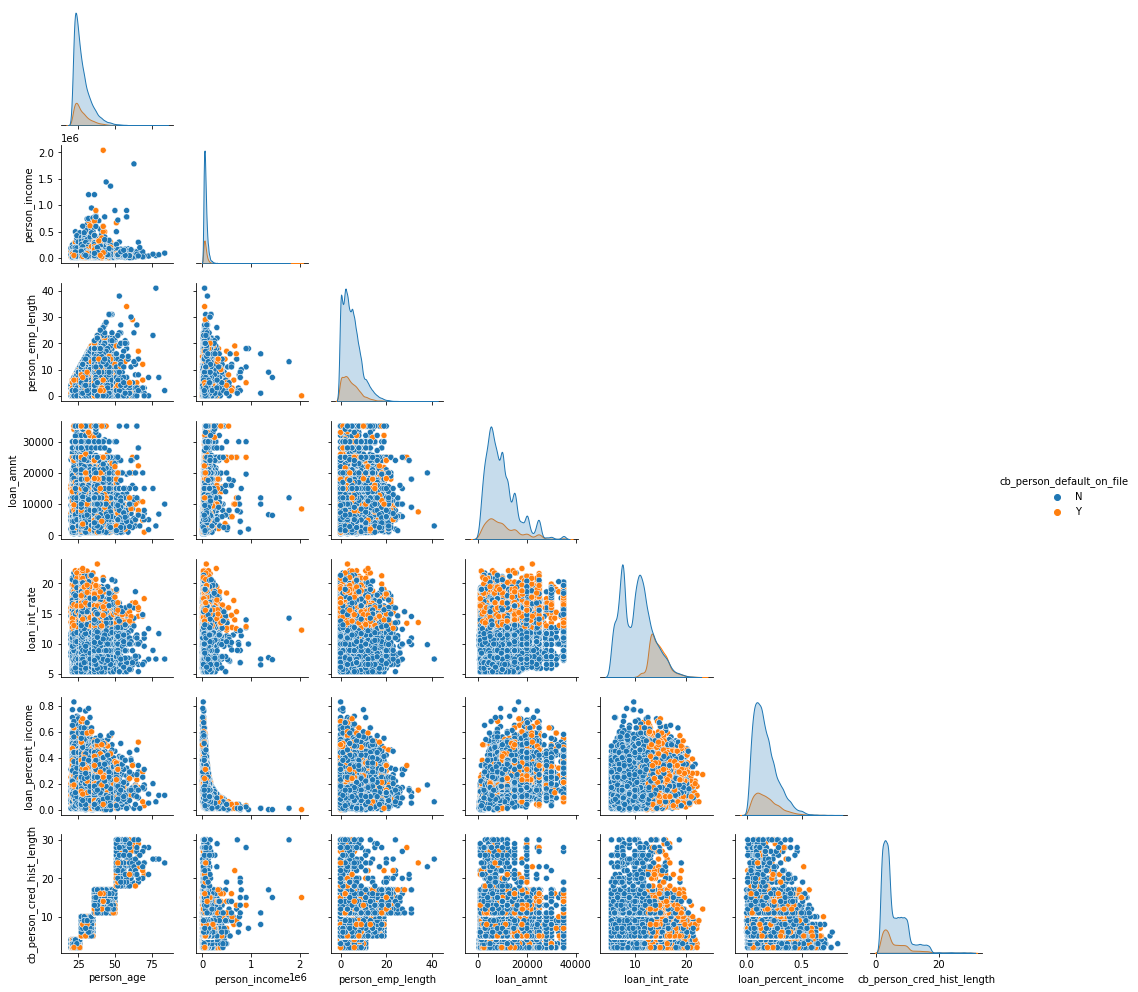

In [21]:
# Plot pairplot
sns.pairplot(data = CreditData.drop('loan_status', axis = 1), # Drop loan status as it has categorical dummy variables
             height = 2, 
             hue = "cb_person_default_on_file", 
             corner = True);

The pairplot above gives us information about the relationships between the numerical variables in our dataset. Clearly, we see that the higher default rates occurred mostly when a person received a high loan interest rate across all ages, incomes, employment lengths and loan amounts received. We also see this trend in the individual density distribution for `loan_int_rate`. Every other variable has relatively similar density distributions among customers with and without credit bureau defaults on file.

The cutoff `loan_int_rate` looks to be around 12.5%

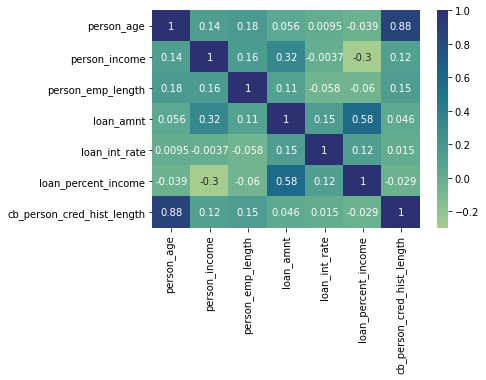

In [22]:
corr = CreditData.drop('loan_status', axis = 1).corr() # Drop loan status as it has categorical dummy variables

# Plot correlation matrix heatmap
sns.heatmap(corr, annot = True, cmap = "crest");

As seen in the correlation heatmap above, there is a very strong positive correlation between a Person's age and their credit history length. We also see this strength in the pairplot above. To avoid the negative effects multicollinearity on a regression model, we may consider removing one of these from the model if it is deemed insignificant to it.

### Categorical Variables
In this section we will explore categorical variables in our datasetand their relationships with the target variable. One  visual for accomplishing this is the bar graph/chart.
The bar chart shows counts within a category and can also have a multidimensional component displayed with color.

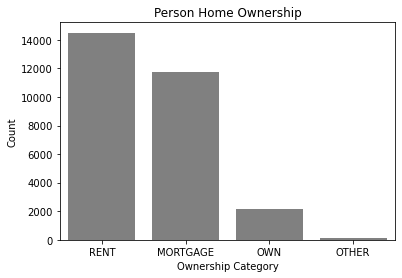

In [23]:
# Person Home Ownership
vbar(CreditData, 
        col = 'person_home_ownership',
       xlabel = 'Ownership Category',
       title = 'Person Home Ownership')

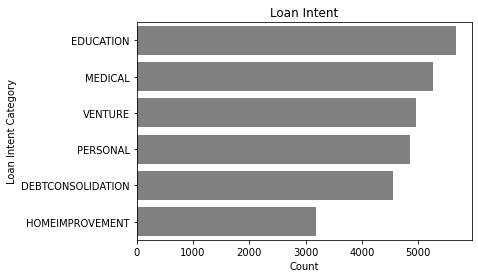

In [24]:
# Loan Intent
hbar(CreditData, 
        col = 'loan_intent',
       ylabel = 'Loan Intent Category',
       title = 'Loan Intent')

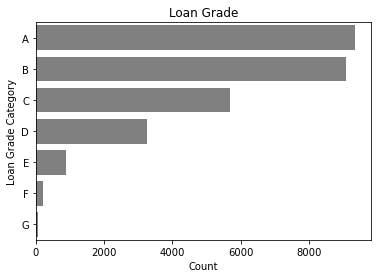

In [25]:
# Loan Grade
hbar(CreditData, 
        col = 'loan_grade',
       ylabel = 'Loan Grade Category',
       title = 'Loan Grade')

Understandably, the vast majority of loans are Grade A and B loans, which are the safest. Let us now take a closer look at how Loan Grade correlates to Default tendency.

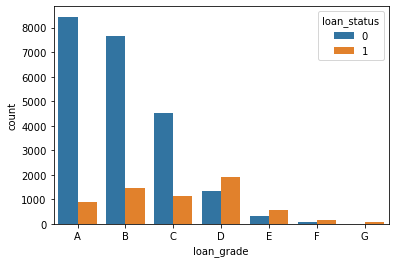

In [26]:
sns.countplot(data = CreditData, x="loan_grade", 
              order = CreditData["loan_grade"].value_counts().index, 
              hue= "loan_status");

Notably, we see that loan grades A and B have no defaults. C and D have slightly more defaults than repayments. E, F and G have slightly less defaults than repayments.

In the next section, we will explore this in more detail.

## Detailed Analysis
In this section, we will undergo a detailed exploratory analysis, during which we will explore which customers are least and most likely to default on loan repayments. We will you use the person information to accomplish this.

We will begin utilizing SQL for querying in this section.

### Default vs. No Default

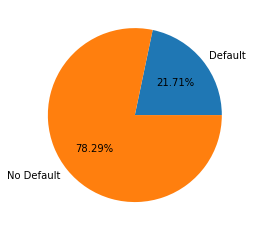

In [111]:
defaulted_col_counts = [np.sum(CreditData['loan_status']), len(CreditData) - np.sum(CreditData['loan_status'])]
labels = ['Default', 'No Default']
plt.pie(defaulted_col_counts, labels = labels, autopct='%.2f%%');

We see that about 22% of all customers have defaults on their record

### Loan Default Rates, Interest Rates and Loan Grade

In [29]:
adr_air_lg = query(
'''
SELECT loan_grade, ROUND(AVG(loan_int_rate), 2) avg_int_rate, 
                    ROUND(100 * AVG(loan_status), 2) AS Loan_Default_Rate  
FROM CreditData
GROUP BY loan_grade
''')
adr_air_lg

,loan_grade,avg_int_rate,Loan_Default_Rate
0,A,7.35,9.61
1,B,11.00,15.93
2,C,13.45,20.33
3,D,15.35,59.22
4,E,17.00,64.67
5,F,18.60,69.86
6,G,20.25,98.31


In [30]:
# Default Rate Statistics Across Loan Grades
adr_air_lg['Loan_Default_Rate'].describe()

count     7.000000
mean     48.275714
std      33.366917
min       9.610000
25%      18.130000
50%      59.220000
75%      67.265000
max      98.310000
Name: Loan_Default_Rate, dtype: float64

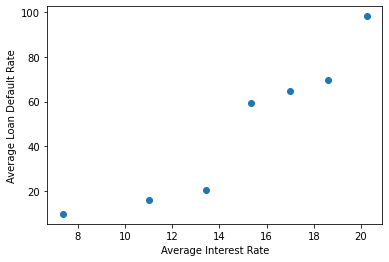

In [31]:
plt.scatter(x = adr_air_lg['avg_int_rate'], y = adr_air_lg['Loan_Default_Rate'])
plt.xlabel("Average Interest Rate")
plt.ylabel("Average Loan Default Rate");

### Question 1: Which customers are MOST & LEAST likely to default on loan repayments?

In this analysis, we define customers that are least likely to default on loan payments as those in Loan Grade A or Loan Grade B. We will examine these customers with the lens of Interest Rates and Loan Default Rates across Age Groups, Income Groups and Employment Length Groups.

#### Age

In [72]:
age_freq = query(
'''
WITH cte AS
(
SELECT person_age, AVG(loan_int_rate) avg_int_rate, AVG(loan_status) AS Loan_Default_Rate,
        COUNT(person_age) AS age_count
FROM CreditData
--WHERE (loan_grade = "A" or loan_grade = "B" or loan_grade = "C" ) AND (loan_int_rate < 13.45)
GROUP BY person_age
)

SELECT 
        CASE 
        WHEN c.person_age BETWEEN 18 and 25 THEN "18-25"
        WHEN c.person_age BETWEEN 26 and 35 THEN "26-35"
        WHEN c.person_age > 35 THEN "Over 35" 
        END AS "Age Range",
        SUM(c.age_count) AS "Customer Count",
        ROUND((avg_int_rate), 1) AS "Average Interest Rate (%)",
        ROUND(100 * AVG(c.Loan_Default_Rate), 2) AS "Loan Default Rate (%)"
        
FROM cte c
GROUP BY 1
''')

age_freq["Customer Percentage (%)"] = round(100 * age_freq["Customer Count"]/np.sum(age_freq["Customer Count"]), 1)
age_freq

,Age Range,Customer Count,Average Interest Rate (%),Loan Default Rate (%),Customer Percentage (%)
0,18-25,13389,11.6,22.37,47.0
1,26-35,12099,11.0,20.43,42.5
2,Over 35,3007,11.3,20.28,10.6


,person_age,Age Range,Loan_Default_Rate,age_count
0,20,18-25,0.142857,14
1,21,18-25,0.305635,1047
2,22,18-25,0.238626,3143
3,23,18-25,0.213864,3390
4,24,18-25,0.218077,3109
5,25,18-25,0.223380,2686
6,26,26-35,0.210695,2188
7,27,26-35,0.211170,1880
8,28,26-35,0.216800,1619
9,29,26-35,0.202285,1488


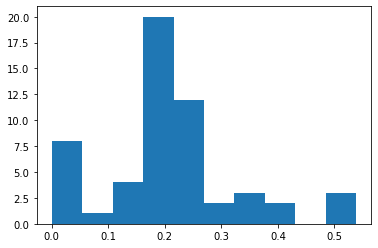

In [100]:
age_group_dist = query(
'''
SELECT person_age,
        CASE 
        WHEN person_age BETWEEN 18 and 25 THEN "18-25"
        WHEN person_age BETWEEN 26 and 35 THEN "26-35"
        WHEN person_age > 35 THEN "Over 35" 
        END AS "Age Range", AVG(loan_status) AS Loan_Default_Rate,
        COUNT(person_age) AS age_count
FROM CreditData
GROUP BY person_age
'''
)

plt.hist(age_group_dist['Loan_Default_Rate']);
age_group_dist

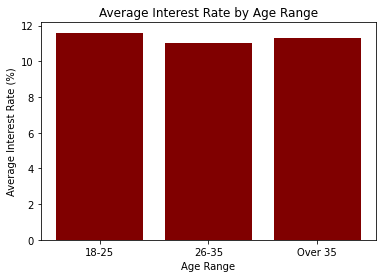

In [74]:
plt.bar(age_freq['Age Range'], age_freq['Average Interest Rate (%)'], color = 'maroon')
plt.xlabel('Age Range')
plt.ylabel('Average Interest Rate (%)')
plt.title ('Average Interest Rate by Age Range')
plt.show();

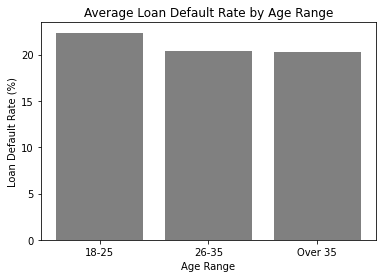

In [77]:
plt.bar(age_freq['Age Range'], age_freq['Loan Default Rate (%)'], color = 'grey')
plt.xlabel('Age Range')
plt.ylabel('Loan Default Rate (%)')
plt.title ('Average Loan Default Rate by Age Range')
plt.show();

#### Income

In [65]:
income_freq = query('''
WITH cte AS
(
SELECT person_income, AVG(loan_int_rate) avg_int_rate, AVG(loan_status) AS Loan_Default_Rate,
        COUNT(person_income) AS income_count
FROM CreditData
GROUP BY person_income
)

SELECT 
        CASE 
        WHEN c.person_income < 56000 THEN "Less than 56000"
        WHEN c.person_income BETWEEN 56000 and 80000 THEN "56000 - 80000"
        WHEN c.person_income > 80000 THEN "Over 80000"
        END AS "Income Range",
        SUM(c.income_count) AS "Customer Count",
        ROUND((avg_int_rate), 1) AS "Average Interest Rate (%)",
        ROUND(100 * AVG(c.Loan_Default_Rate), 2) AS "Loan Default Rate (%)"
        
FROM cte c
GROUP BY 1
ORDER BY 2 DESC, 1 ASC
''')

income_freq["Customer Percentage (%)"] = round(100 * income_freq["Customer Count"]/np.sum(income_freq["Customer Count"]), 1)
income_freq

,Income Range,Customer Count,Average Interest Rate (%),Loan Default Rate (%),Customer Percentage (%)
0,Less than 56000,14247,13.2,33.66,50.0
1,56000 - 80000,7441,11.3,21.08,26.1
2,Over 80000,6807,18.6,14.86,23.9


In [93]:
income_group_dist = query(
'''
SELECT person_income, CASE 
        WHEN person_income < 56000 THEN "Less than 56000"
        WHEN person_income BETWEEN 56000 and 80000 THEN "56000 - 80000"
        WHEN person_income > 80000 THEN "Over 80000"
        END AS "Income Range", AVG(loan_status) AS Loan_Default_Rate,
        COUNT(person_income) AS income_count
FROM CreditData
GROUP BY person_income
'''
)

#plt.hist(income_group_dist['Loan_Default_Rate']);

income_group_dist

,person_income,Income Range,Loan_Default_Rate,income_count
0,4000,Less than 56000,1.0,1
1,4080,Less than 56000,1.0,1
2,4200,Less than 56000,1.0,1
3,4800,Less than 56000,1.0,3
4,5000,Less than 56000,1.0,2
...,...,...,...,...
3829,1200000,Over 80000,0.0,2
3830,1362000,Over 80000,0.0,1
3831,1440000,Over 80000,0.0,1
3832,1782000,Over 80000,0.0,1


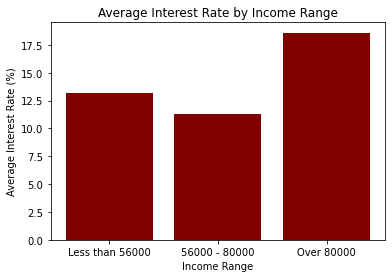

In [66]:
plt.bar(income_freq['Income Range'], income_freq['Average Interest Rate (%)'], color = 'maroon')
plt.xlabel('Income Range')
plt.ylabel('Average Interest Rate (%)')
plt.title ('Average Interest Rate by Income Range')
plt.show();

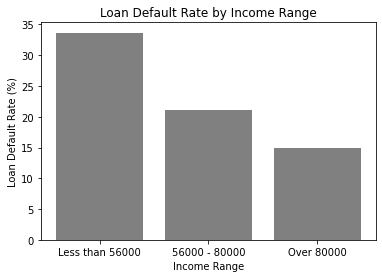

In [67]:
plt.bar(income_freq['Income Range'], income_freq['Loan Default Rate (%)'], color = 'grey')
plt.xlabel('Income Range')
plt.ylabel('Loan Default Rate (%)')
plt.title ('Loan Default Rate by Income Range')
plt.show();

#### Employment Length

In [70]:
empl_length_freq = query('''
WITH cte AS
(
SELECT person_emp_length, AVG(loan_int_rate) avg_int_rate,  AVG(loan_status) AS Loan_Default_Rate,
        COUNT(person_emp_length) AS empl_length_count
FROM CreditData
GROUP BY person_emp_length
)

SELECT 
        CASE 
        WHEN c.person_emp_length BETWEEN 0 AND 4 THEN "Entry-level"
        WHEN c.person_emp_length BETWEEN 5 AND 9 THEN "Mid Senior Level"
        WHEN c.person_emp_length > 9 THEN "Senior Level"
        END AS "Employment Class",
        SUM(c.empl_length_count) AS "Customer Count",
        ROUND((avg_int_rate), 1) AS "Average Interest Rate (%)",
        ROUND(100 * AVG(c.Loan_Default_Rate), 2) AS "Loan Default Rate (%)"
        
FROM cte c
GROUP BY 1
ORDER BY 2 DESC, 1 ASC
''')

empl_length_freq["Customer Percentage"] = round(100 * empl_length_freq["Customer Count"]/np.sum(empl_length_freq["Customer Count"]), 1)
empl_length_freq

,Employment Class,Customer Count,Average Interest Rate (%),Loan Default Rate (%),Customer Percentage
0,Entry-level,15451,11.2,24.71,54.2
1,Mid Senior Level,9787,10.9,18.43,34.3
2,Senior Level,3257,10.8,22.76,11.4


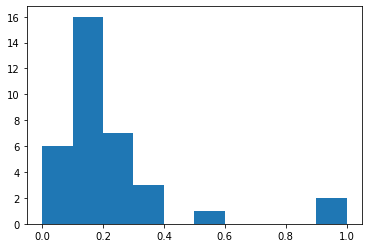

In [97]:
empl_class_dist = query(
'''
SELECT person_emp_length, CASE 
        WHEN person_emp_length BETWEEN 0 AND 4 THEN "Entry-level"
        WHEN person_emp_length BETWEEN 5 AND 9 THEN "Mid Senior Level"
        WHEN person_emp_length > 9 THEN "Senior Level"
        END AS "Employment Class", AVG(loan_status) AS Loan_Default_Rate,
        COUNT(person_emp_length) AS person_emp_length_count
FROM CreditData
GROUP BY person_emp_length
'''
)
plt.hist(empl_class_dist['Loan_Default_Rate']);

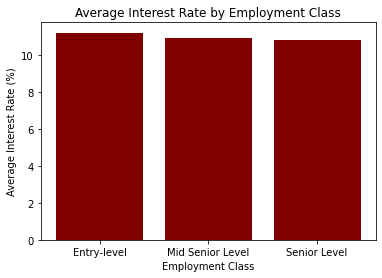

In [78]:
plt.bar(empl_length_freq['Employment Class'], empl_length_freq['Average Interest Rate (%)'], color = 'maroon')
plt.xlabel('Employment Class')
plt.ylabel('Average Interest Rate (%)')
plt.title ('Average Interest Rate by Employment Class')
plt.show();

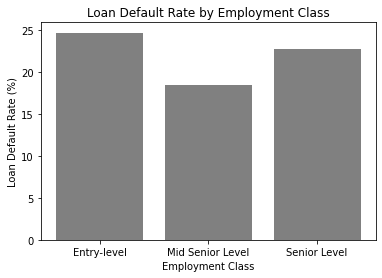

In [79]:
plt.bar(empl_length_freq['Employment Class'], empl_length_freq['Loan Default Rate (%)'], color = 'grey')
plt.xlabel('Employment Class')
plt.ylabel('Loan Default Rate (%)')
plt.title ('Loan Default Rate by Employment Class')
plt.show();

# Summary & Business Implications

# Next Steps